# Задача 2

---

## Задание

Решение интегрального уравнения первого рода. 

Дано уравнение (22) (см. методичку стр. 23). 

ПЕРВЫЙ СПОСОБ 

Сводим его к СЛАУ (24), для её решения применяем метод регуляризации. 

Для отладки использовать функции $z_1(s) = 1$ и $z_2(s) = s(1-s)$ по которым строятся соответствующие правые части $u(x)$

ВТОРОЙ СПОСОБ 

Решается уравнение (27) с однородными граничными условиями z(0) = z(1) = 0 (см. стр. 26). Уравнение Эйлера (32), его аппроксимация приведена на стр. 27, в итоге приходим к СЛАУ, для решения которых применяется первый способ и отлаживается на тех же функциях. 

Необходимо сравнить результаты обоих методов, привести графики и дать практические рекомендации по решению таких задач (выбор n и параметра регуляризации).  


## Вариант 26.
Ядро $2 + e^{-3sx}$

---

## Решение


In [182]:
import math
import numpy as np
import pandas as pd

from scipy import linalg as la
from scipy import integrate

import matplotlib.pyplot as plt
import seaborn as sns

# Первый способ
Задаем ядро

In [183]:
K = lambda s, x: 2 + math.exp(-3 * s * x)

Отлаживаем решение на функции $z_1(s) = 1$


In [184]:
z_1 = lambda _: 1

Строим $u_1(x)$, как интеграл от $ядра$ на отрезке $[0, 1]$, который равен $2 - (e^{-3x} - 1)/(3x)$

In [185]:
u_1 = lambda x: 2 - (math.exp(-3 * x) - 1) / (3 * x)

Решаем СЛАУ регуляризацией

In [186]:
def solve_with_regularization(matrix, rhs, real_ans):#matrix, right_vect, alpha):
    answers = []
    errors = []
    ans = np.zeros_like(rhs)
    best_alpha = 0
    min_error = np.inf

    for j in reversed(range(2, 15)):
        alpha = np.random.uniform(10 ** -j, 10 ** (-j + 1))

        new_matrix = matrix.getH() @ matrix + alpha * np.identity(matrix.shape[0])

        x = la.solve(new_matrix, matrix.getH() @ rhs)

        curr_error = la.norm(real_ans - x)
        answers.append(x)
        errors.append(curr_error)

    return answers, errors

def solve_int_eq(n, kernel, right_vect, z):
    def row2column(row):
        return row[:, np.newaxis]
    net = np.linspace(0, 1, num=n + 1)
    _m = np.zeros( (n, n) )
    matrix = np.matrix(_m)

    A = [
        net[i] - net[i - 1] for i in range(1, n + 1)
    ]

    S = [
        (net[i - 1] + net[i]) / 2 for i in range(1, n + 1)
    ]

    right_side = row2column(np.array([right_vect(sk) for sk in S]))

    for i in range(n):
        for j in range(n):
            matrix[i, j] = A[j] * kernel(S[i], S[j])

    alpha_deg_range = (-15, 5)
    answrs, errors = solve_with_regularization(matrix, right_side, row2column(np.array([z(sk) for sk in S])))

    return answrs, errors

Ищем ошибку

In [187]:
def evaluate_error(results, expected):
    errors = []

    for result in results:
        error = np.abs(1 - la.norm(result) / la.norm(expected))
        errors.append(error)
    
    return errors

В таблице продемонстрируем зависимость $alpha$ и погрешности решения

In [188]:
def evaluate(alphas, ers):
    df = pd.DataFrame(
        {
            'alphas': alphas,
            'errors': ers
        }
    )
    print(df)
    

In [189]:
n = 30
alphas = [10**deg for deg in range(-15, -2)]
_, errors = solve_int_eq(n, K, u_1, z_1)

evaluate(alphas, errors)

          alphas    errors
0   1.000000e-15  0.476382
1   1.000000e-14  0.039694
2   1.000000e-13  0.036154
3   1.000000e-12  0.034939
4   1.000000e-11  0.021853
5   1.000000e-10  0.013922
6   1.000000e-09  0.011536
7   1.000000e-08  0.010310
8   1.000000e-07  0.009670
9   1.000000e-06  0.015608
10  1.000000e-05  0.043361
11  1.000000e-04  0.209537
12  1.000000e-03  0.362932


Отлаживаем решение теперь на $z_2(s) = s(1-s)$

In [190]:
z_2 = lambda s: s * (1 - s)

Строим $u_2(x)$, как интеграл от $ядра$ * $s(1-s)$ на отрезке $[0, 1]$, который равен $(e^{-3x} (e^{3x} (9 x^3 + 3 x - 2) + 3 x + 2))/(27 x^3)$

In [191]:
u_2 = lambda x: (math.exp(-3 * x) * (math.exp(3 * x) * (9 * x**3 + 3*x -2) + 3*x + 2)) / (27 * x**3)

Вычислим ошибки для каждого альфа:

In [192]:
n = 30
alphas = [10**deg for deg in range(-15, -2)]
_, errors = solve_int_eq(n, K, u_2, z_2)

evaluate(alphas, errors)

          alphas    errors
0   1.000000e-15  0.016076
1   1.000000e-14  0.002253
2   1.000000e-13  0.002388
3   1.000000e-12  0.002344
4   1.000000e-11  0.004877
5   1.000000e-10  0.016826
6   1.000000e-09  0.019031
7   1.000000e-08  0.079718
8   1.000000e-07  0.118902
9   1.000000e-06  0.142014
10  1.000000e-05  0.210793
11  1.000000e-04  0.377062
12  1.000000e-03  0.395356


# Второй способ

Решаем интегральное уравнение с однородными граничными условиями $z(0) = z(1) = 0$.

Для этого приводим его к уравнению Эйлера, после чего приходим к СЛАУ, для решения которых
применяем первый способ.

In [193]:
def K1(s, t):
  return integrate.quad(lambda x: K(x, s) * K(x, t), 0, 1)[0]

def get_eq(n, p, r, alpha, u):
    A = np.matrix(np.zeros((n + 1, n + 1)))
    b = np.zeros(n + 1)
    b = b[:, np.newaxis]
    h = 1 / n
    s = np.linspace(0, 1, n + 1)
    t = np.linspace(0, 1, n + 1)

    A[0, 0] = 1
    b[0] = 0
    A[n, n] = 1
    b[n] = 0

    for k in range(1, n):
        A[k, k - 1] = -alpha * p / h**2
        A[k, k] = alpha * 2 * p / h**2 + alpha * r
        A[k, k + 1] = -alpha * p / h**2

        A[k, 0] += h / 2 * K1(s[k], t[0])
        A[k, n] += h / 2 * K1(s[k], t[n])
        for j in range(1, n):
            A[k, j] += h * K1(s[k], t[j])

    for k in range (1, n):
        l = lambda t : K(t, s[k]) * u(t)
        b[k] = integrate.quad(l, 0, 1)[0]

    return A, b

def method2(n, u, z, p, r):
    n = n - 1
    x = np.linspace(0, 1, n + 1)
    zs = np.zeros(n + 1)

    norms = []
    answs = []

    for i in range(n + 1):
        zs[i] = z(x[i])
    zs = zs[:, np.newaxis]

    for i in range(2, 15):
        alpha = 10**(-i)

        A, b = get_eq(n, p, r, alpha, u)
        ans = np.linalg.solve(A, b)
        norm = np.linalg.norm(ans - zs)
        
        answs.append(ans)
        norms.append(norm)
        

    return answs, norm    

Отлаживаем решение на $z_2(s) = s(1-s)$

Граничные условия z(0) = z(1) = 0

Для этого на графике покажем отклонение полученного решения от точного.
Точное решение показано непрерывной линией, от которой прямыми линиями
показаны расхождение 

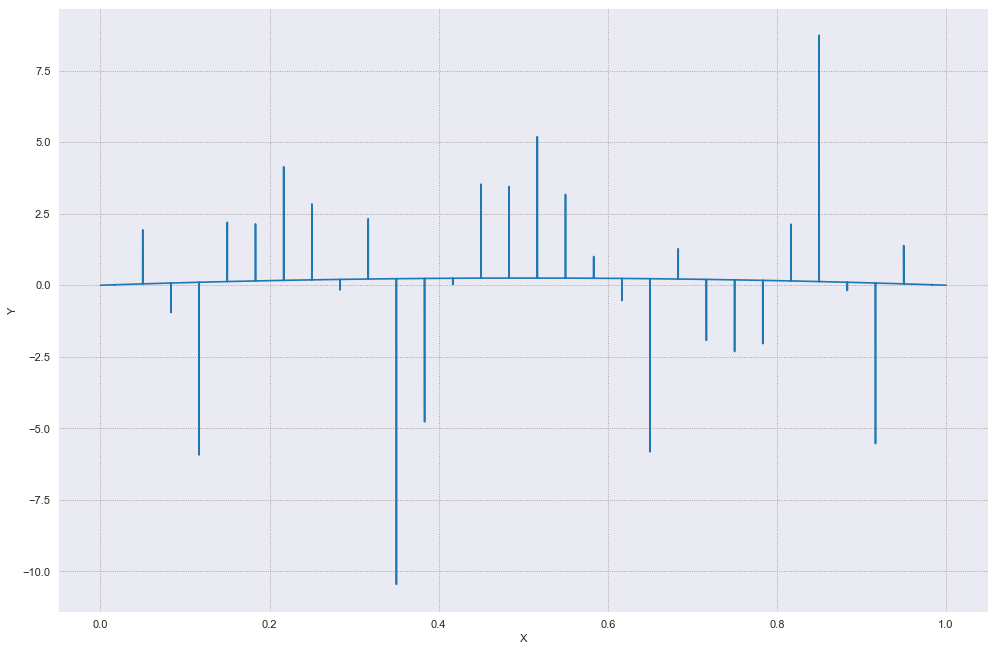

Лучшее alpha: 1e-06


In [194]:
n = 30
alphas = [10**deg for deg in range(-15, -5)]
solution, errors = method2(n, u_2, z_2, 0, 0)

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
def show_plot(ans, real_z):
  data = {'X' : [], 'Легенда' : [], 'Y' : []}
  grid = np.linspace(0, 1, n + 1)

  data['X'].extend([(grid[i-1] + grid[i])/2 for i in range(1, n + 1)])
  data['Легенда'].extend("Регуляризованный ответ, n - " + str(n) for _ in range(n))
  data['Y'].extend(*ans.T)

  grid = np.linspace(0, 1, 10000)
  data['X'].extend(grid)
  data['Легенда'].extend("Настоящий ответ" for _ in range(10000))
  data['Y'].extend(map(real_z, grid))

  dataframe = pd.DataFrame(data)
  plt.figure(figsize=(15, 10), dpi=80)
  sns.lineplot(data=dataframe, x='X', y='Y', palette=['r', 'g'])
  plt.show()


show_plot(solution[0], z_2)
print(f"Лучшее alpha: {alphas[-1]}")

# Выводы

- Для больших alpha первый метод показывает невысокую точность. Так, погрешность для $alpha = 0.001$ существенно выше,
чем для других измеренных значений alpha. Наилучший же результат был достигнут при $alpha = 1.000000e-06$ для функции
$z(s) = 1$ и $alpha = 1.000000e-12$ для функции.

- Для второго способа наилучший результаты был достигнут при $alpha = 1.000000e-06$ и в целом показывает лучший результат

В целом, альфа должно находиться в диапазоне от $alpha = 1.000000e-06 - alpha = 1.000000e-12$